In [2]:
import pandas as pd
import numpy as np


In [ ]:
# Логистической регрессией решают задачи классификации. 
# Например, у нас есть 100 животных. Среди них попадаются либо кошки, либо собаки. 
# Нужно обучить компьютер научиться отличать кошек от собак

# "Кошка", "Собака" - это категория.
# Среди признаков нам могут быть даны масса тела, длина туловища, количество зубов, наличие\отсутствие шерсти, размер носа и т.п. 
# В задачах ML такие признаки называются "фичами" от англ. "feature" (характеристика, признак, свойство)

# Решить задачу классификации в данном случае - научить машину отличать кошек от собак по приведенным признакам.

# Задача на классификацию цветков Ириса

Первая задача связана с определинием одного из трех видов Ириса:
- Ирис щетинистый (Iris setosa)
- Ирис виргинский (Iris virginica) 
- Ирис разноцветный (Iris versicolor):

По четырем свойствам (длина\ширина чашелистика и лепестков) нужно научиться отделять один вид от других

Подробнее здесь: [Ирисы Фишера-Андерсона](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = pd.read_csv('../../data/raw/iris.csv')
iris.head()
# столцбы:
# sepal_length, sepal_width, petal_length, petal_width - фичи 
# species - категория, которую и надо будет научиться предсказывать по фичам

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<img src="../../assets/iris-species.png">

In [4]:
# таблица iris содержит равное количество объектов каждой категории
print('Всего объектов в датасете:', iris.shape[0],'\n')

print('Количество объектов для каждой категории:')
print(iris.species.value_counts())

Всего объектов в датасете: 150 

Количество объектов для каждой категории:
versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


In [5]:
# в данном датасете категория - это строка. 
#Логистическая регрессия для категорий не принимает строки
# Решение - каждой уникальной категории присвоить какой-то номер
iris.species = iris.species.astype('category') # конвертируем столбец в категориальный тип
iris['species_code'] = iris.species.cat.codes # .cat.codes позволяет получить сгенерированные номера категории

Для первого знакомства с логистической регрессией разбиение на обучающую\тестовую выборку максимально упрощено.

In [6]:
test = iris.sample(frac = .2) # "топорным" способом отделяем в тестовую выборку случаные 20% от всего датасета
train = iris.drop(test.index) # в обучающую выборку помещаем те строки датасета, которые не вошли в тестовую выборку

In [7]:
# Простая визуализация разбиения категорий на обучающую\тестовую выборку
pd.concat([
    train.species.value_counts().to_frame('train'),
    test.species.value_counts().to_frame('test')
], axis = 1)

,train,test
setosa,41,9
versicolor,41,9
virginica,38,12


In [8]:
# формируем выборки под понятный для логистической регрессии объекты.
# посмотрите, что там лежит. 
# Логистическая регрессия прекрасно понимает входящие данные от пандаса (в отличие от линейной регрессии)
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

train_y = train.species_code
test_y = test.species_code

# Обучаем модель

<img src="../../assets/fitpredict.jpg">

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(train_X, train_y)
predict_y = lr.predict(test_X)

In [ ]:
print(test_y.values) # Тестовая выборка
print(predict_y) # то, что напрогнозировали

In [ ]:
Если все правильно отработало, то предсказанные категории (их всего три: 0,1,2) будут почти или полностью совпадать с тестовой выборкой.
Конечно же глазками никто не смотрит совпадение категорий и используют различного рода метрики, матрицы и другие инструменты.
Но этот простейший пример позволяет понять минимум, нужный для умения предсказывать категориальные данные


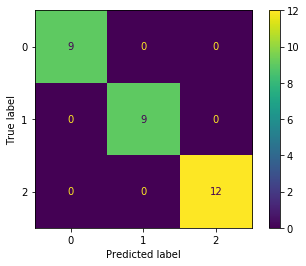

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(LogisticRegression().fit(train_X,train_y), test_X, test_y)

In [19]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,virginica,2
145,6.7,3.0,5.2,2.3,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


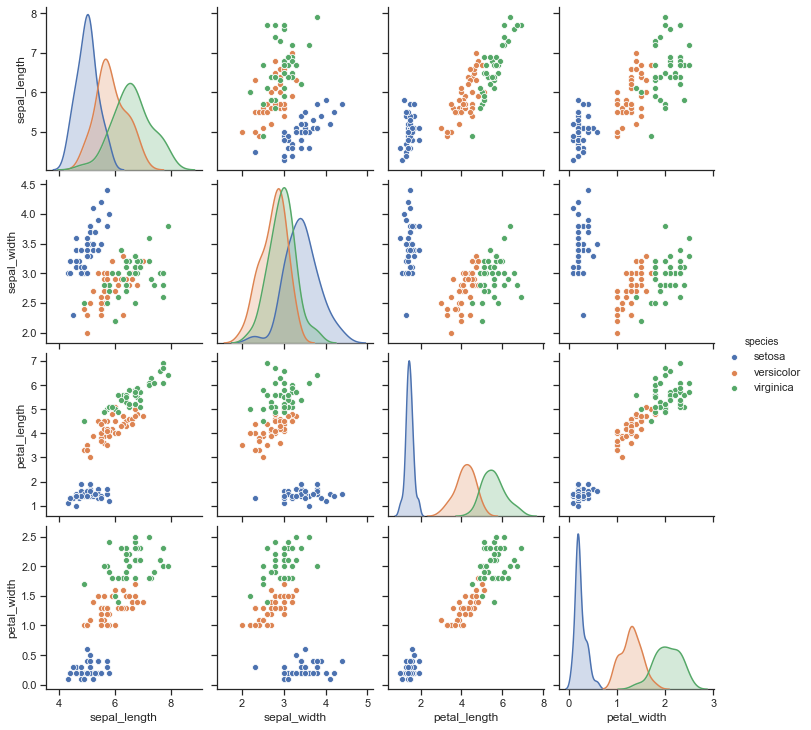

In [21]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train.drop('species_code', axis =1), hue = 'species')